In [10]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

In [11]:
df = pd.read_csv(r"../data/Telco_customer_churn.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()
df = df.drop('customerID', axis=1)

In [13]:
categorical_cols = df.select_dtypes(include=['boolean', 'object']).columns

encoder = OneHotEncoder(drop="if_binary", sparse_output=False)  
encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df = df.drop(columns=categorical_cols)

df = df.reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)
df.head().T

,0,1,2,3,4
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
MonthlyCharges,29.85,56.95,53.85,42.30,70.70
TotalCharges,29.85,1889.50,108.15,1840.75,151.65
gender_Male,0.00,1.00,1.00,1.00,0.00
Partner_Yes,1.00,0.00,0.00,0.00,0.00
Dependents_Yes,0.00,0.00,0.00,0.00,0.00
PhoneService_Yes,0.00,1.00,1.00,0.00,1.00
MultipleLines_No,0.00,1.00,1.00,0.00,1.00
MultipleLines_No phone service,1.00,0.00,0.00,1.00,0.00


In [14]:
df = df.rename(columns={'Churn_Yes': 'Churn'})

In [15]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 40) (5625,)
(1407, 40) (1407,)


In [17]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}), 
    ('Naive Bayes', GaussianNB(), {})  
]

In [18]:
def without_SMOTE():
    best_model = None 
best_acc = 0
best_f1 = 0
model_scores = []

for name, model, param_grid in models:
    print(f"\nTraining {name}...")

    # Define pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Perform hyperparameter tuning if param_grid exists
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_  # Update pipeline with best model

        print(f"Best params for {name}: {grid_search.best_params_}")

    # Fit model on training data
    pipeline.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 Score
    
    # Store results
    model_scores.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})
    print(f"Model: {name} | Accuracy: {acc:.3f} | F1 Score: {f1:.3f}")
    
    # Track best model based on accuracy & F1 score
    if acc > best_acc or (acc == best_acc and f1 > best_f1):
        best_acc = acc
        best_f1 = f1
        best_model = pipeline

# Convert scores into a DataFrame for analysis
scores_df = pd.DataFrame(model_scores).sort_values(by=["Accuracy", "F1 Score"], ascending=False)
print("\nOverall Model Performance:")
print(scores_df)

print(f"\nBest Model:\nTest Accuracy - {best_acc:.3f} | F1 Score - {best_f1:.3f}\nModel: {best_model}")  



Training Random Forest...
Best params for Random Forest: {'model__max_depth': 10, 'model__n_estimators': 200}
Model: Random Forest | Accuracy: 0.795 | F1 Score: 0.786

Training Gradient Boosting...
Best params for Gradient Boosting: {'model__learning_rate': 0.05, 'model__n_estimators': 100}
Model: Gradient Boosting | Accuracy: 0.792 | F1 Score: 0.781

Training Support Vector Machine...
Best params for Support Vector Machine: {'model__C': 1, 'model__gamma': 'scale'}
Model: Support Vector Machine | Accuracy: 0.733 | F1 Score: 0.747

Training Logistic Regression...
Best params for Logistic Regression: {'model__C': 1, 'model__penalty': 'l2'}
Model: Logistic Regression | Accuracy: 0.731 | F1 Score: 0.746

Training K-Nearest Neighbors...
Best params for K-Nearest Neighbors: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
Model: K-Nearest Neighbors | Accuracy: 0.757 | F1 Score: 0.755

Training Decision Tree...
Best params for Decision Tree: {'model__max_depth': 10, 'model__min_samples

#### Overall Model Performance

| Model                   | Accuracy | F1 Score |
|-------------------------|----------|----------|
| **Random Forest**       | **0.795** | **0.786** |
| Gradient Boosting      | 0.792    | 0.781    |
| Ada Boost             | 0.786    | 0.778    |
| K-Nearest Neighbors   | 0.757    | 0.755    |
| Decision Tree         | 0.753    | 0.748    |
| Support Vector Machine | 0.733    | 0.747    |
| Logistic Regression   | 0.731    | 0.746    |
| Naive Bayes           | 0.681    | 0.699    |

---

#### Best Model

- **Model**: Random Forest  
- **Test Accuracy**: `0.795`  
- **F1 Score**: `0.786`  
- **Pipeline Used**:
  ```python
  Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('model', RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42))
  ])

---
Yes, this is mr. GPT Helping me.

In [19]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

In [20]:
best_model = None
best_score = 0.0
model_scores = []

for name, model, param_grid in models:
    print(f"\nTraining {name}...")

    if name == 'Naive Bayes':
        pipeline = Pipeline([('model', model)])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()), 
            ('model', model)
        ])

    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=0, n_jobs=-1)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    pipeline.fit(Xr_train, yr_train)

    y_pred = pipeline.predict(Xr_test)

    accuracy = accuracy_score(yr_test, y_pred)
    f1 = f1_score(yr_test, y_pred, average='weighted')

    model_scores.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1})
    
    print(f"Model: {name} | Accuracy: {accuracy:.3f} | F1 Score: {f1:.3f}")

    if f1 > best_score:
        best_score = f1
        best_model = pipeline

scores_df = pd.DataFrame(model_scores).sort_values(by=["F1 Score"], ascending=False)
print("\nOverall Model Performance:")
print(scores_df)

print(f"\nBest Model:\nTest Accuracy - {best_model.score(Xr_test, yr_test):.3f}\nF1 Score - {best_score:.3f}\nModel: {best_model}")



Training Random Forest...
Model: Random Forest | Accuracy: 0.966 | F1 Score: 0.966

Training Gradient Boosting...
Model: Gradient Boosting | Accuracy: 0.965 | F1 Score: 0.965

Training Support Vector Machine...
Model: Support Vector Machine | Accuracy: 0.945 | F1 Score: 0.945

Training Logistic Regression...
Model: Logistic Regression | Accuracy: 0.923 | F1 Score: 0.923

Training K-Nearest Neighbors...
Model: K-Nearest Neighbors | Accuracy: 0.912 | F1 Score: 0.911

Training Decision Tree...
Model: Decision Tree | Accuracy: 0.946 | F1 Score: 0.946

Training Ada Boost...
Model: Ada Boost | Accuracy: 0.952 | F1 Score: 0.952

Training Naive Bayes...
Model: Naive Bayes | Accuracy: 0.891 | F1 Score: 0.890

Overall Model Performance:
                    Model  Accuracy  F1 Score
0           Random Forest  0.965636  0.965612
1       Gradient Boosting  0.964777  0.964713
6               Ada Boost  0.951890  0.951756
5           Decision Tree  0.945876  0.945833
2  Support Vector Machine  0.945

#### Overall Model Performance

| Model                   | Accuracy | F1 Score |
|-------------------------|----------|----------|
| **Gradient Boosting**   | **0.959** | **0.959** |
| Random Forest          | 0.952    | 0.952    |
| Ada Boost             | 0.946    | 0.946    |
| Decision Tree         | 0.935    | 0.935    |
| Support Vector Machine | 0.930    | 0.930    |
| Logistic Regression   | 0.924    | 0.924    |
| K-Nearest Neighbors   | 0.909    | 0.908    |
| Naive Bayes           | 0.898    | 0.897    |

---

#### Best Model

- **Model**: Gradient Boosting  
- **Test Accuracy**: `0.959`  
- **F1 Score**: `0.959`  
- **Pipeline Used**:
  ```python
  Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('model', GradientBoostingClassifier(n_estimators=200, random_state=42))
  ])


Brier Score Before Calibration: 0.0250
Brier Score After Calibration: 0.0256


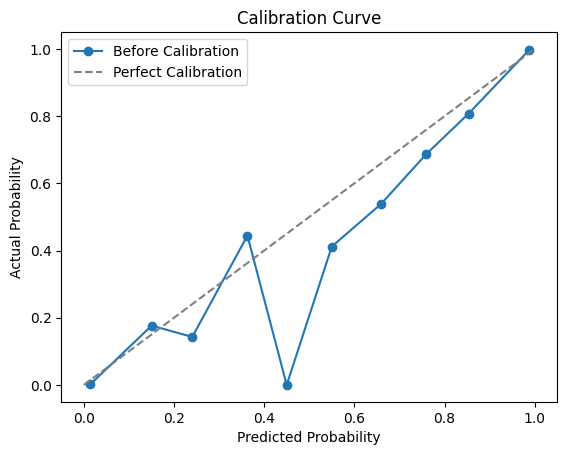

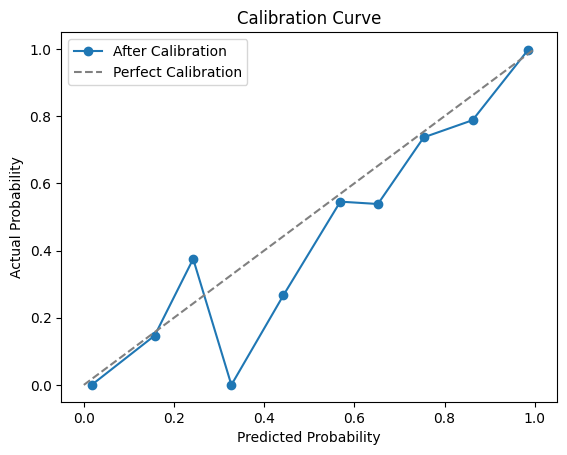

In [21]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import calibration_curve

best_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
best_model.fit(Xr_train, yr_train)

calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid', cv=5)
calibrated_model.fit(Xr_train, yr_train)

y_probs_before = best_model.predict_proba(Xr_test)[:, 1] 
y_probs_after = calibrated_model.predict_proba(Xr_test)[:, 1]

brier_before = brier_score_loss(yr_test, y_probs_before)
brier_after = brier_score_loss(yr_test, y_probs_after)

print(f"Brier Score Before Calibration: {brier_before:.4f}")
print(f"Brier Score After Calibration: {brier_after:.4f}")

def plot_calibration_curve(y_true, y_probs, title):
    prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)

    plt.plot(prob_pred, prob_true, marker='o', label=title)
    plt.plot([0, 1], [0, 1], linestyle="--", color='gray', label="Perfect Calibration")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Actual Probability")
    plt.legend()
    plt.title("Calibration Curve")
    plt.show()

plot_calibration_curve(yr_test, y_probs_before, "Before Calibration")
plot_calibration_curve(yr_test, y_probs_after, "After Calibration")


- Better Pre-calibration

In [22]:
import joblib

joblib.dump(best_model, "../models/v1.2_Gradient_Boosting_calibrated.pkl")
print("Pre-calibrated model saved successfully")


Pre-calibrated model saved successfully


In [23]:
best_model = joblib.load("../models/v1.2_Gradient_Boosting_calibrated.pkl")
print("Pre-calibrated model loaded successfully!")


Pre-calibrated model loaded successfully!
